In [1]:
pwd

'C:\\Users\\SAMSUNG'

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("bat_process.csv", encoding = "euc-kr")

In [8]:
df.head()

,lot_id,tray_id,cell_id,judge,dt_start,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1002,CELL-10300,양품,25NOV2023:05:17:55,20,04열,08연,04단,03열,...,54연,10단,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0
1,LOT-100,TRAY-1002,CELL-10301,양품,25NOV2023:05:17:55,18,04열,08연,04단,03열,...,54연,10단,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0
2,LOT-100,TRAY-1002,CELL-10302,양품,25NOV2023:05:17:55,2,04열,08연,04단,03열,...,54연,10단,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0
3,LOT-100,TRAY-1002,CELL-10303,양품,25NOV2023:05:17:55,24,04열,08연,04단,03열,...,54연,10단,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0
4,LOT-100,TRAY-1002,CELL-10304,양품,25NOV2023:05:17:55,15,04열,08연,04단,03열,...,54연,10단,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0


In [9]:
df.columns

Index(['lot_id', 'tray_id', 'cell_id', 'judge', 'dt_start', 'rta1_cell_no',
       'rta1_box_col', 'rta1_box_row', 'rta1_box_dan', 'hta1_box_col',
       ...
       'sa3_box_row', 'sa3_box_dan', 'socv3_ocv', 'ocv2_deltaocv',
       'ocv1_deltaocv', 'm1_thick', 'm1_voltage', 'm1_res_ac', 'm1_mv',
       'm1_voltage_an'],
      dtype='object', length=109)

In [12]:
# Checking the basic statistics of the data
data_description = df.describe()

# Checking for missing values in the data
missing_values = df.isnull().sum()

data_description, missing_values

(       rta1_cell_no      ocv1_ocv   c1_curr_end  c1_voltage_avg       c1_capa  \
 count  38595.000000  38595.000000  38595.000000    38595.000000  38595.000000   
 mean      12.796528   3335.285374   6799.922529     3779.998471   6468.377225   
 std        7.106383      7.715451      1.534529        1.755476     30.468366   
 min        1.000000   3269.000000   6790.000000     3771.000000   5768.000000   
 25%        7.000000   3330.000000   6799.000000     3779.000000   6452.000000   
 50%       13.000000   3334.000000   6800.000000     3780.000000   6470.000000   
 75%       19.000000   3339.000000   6801.000000     3781.000000   6486.000000   
 max       25.000000   3389.000000   6807.000000     3839.000000   6648.000000   
 
            c1_ccval    c1_time_cc   c1_temp_avg  dc1_curr_end  \
 count  38595.000000  38595.000000  38595.000000  38595.000000   
 mean    6468.377225   3426.564970    277.258868   6799.329628   
 std       30.468366     16.148575     13.410787      0.727114

In [16]:
df2 = pd.read_csv("bat_tat.csv", encoding = "euc-kr")

C:\Users\SAMSUNG\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

IndexError: index 10 is out of bounds for axis 0 with size 10

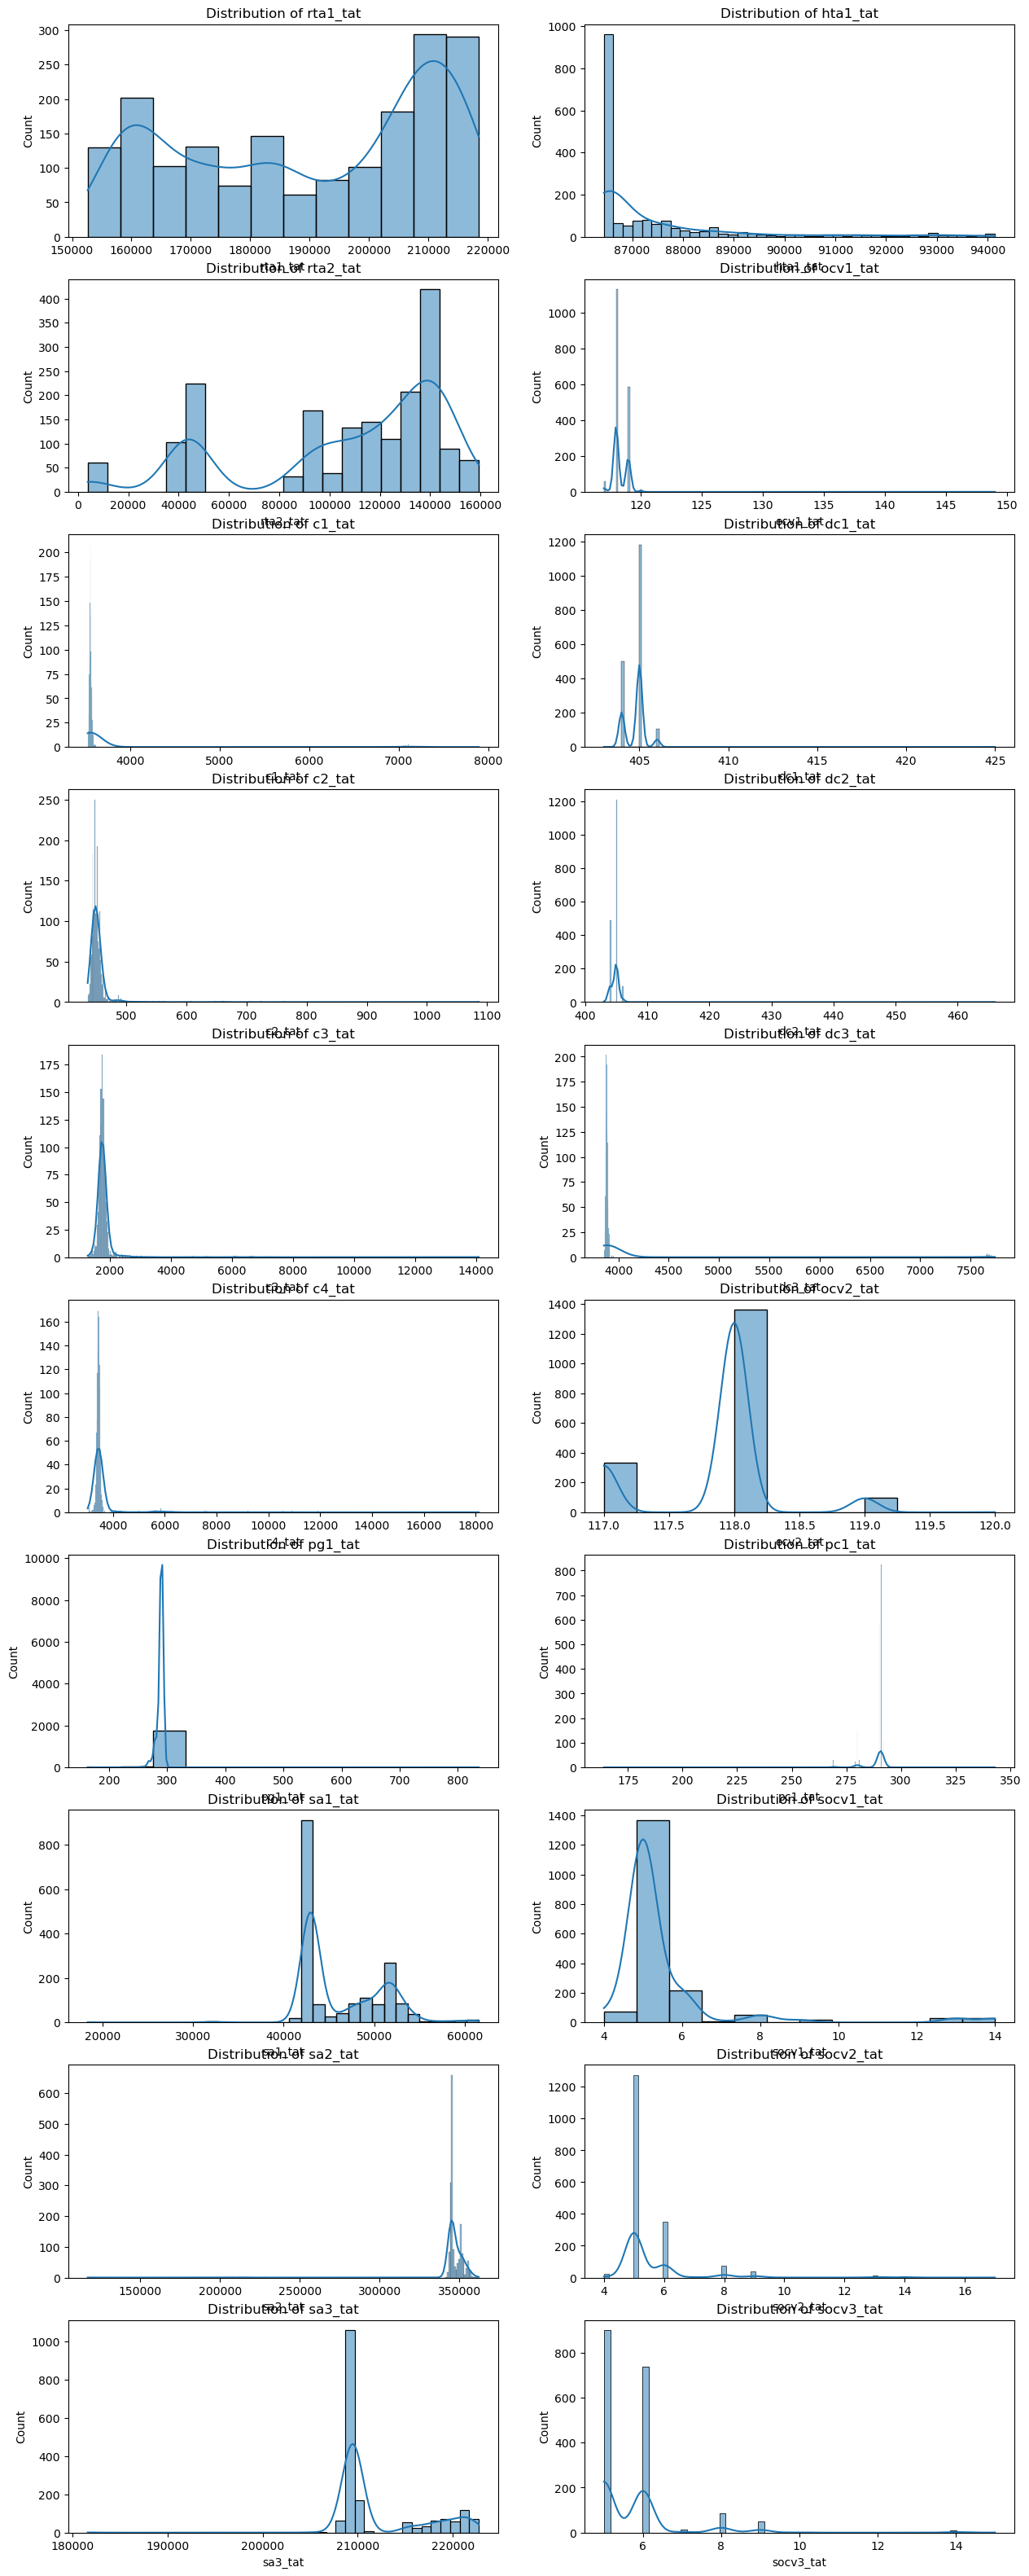

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주요 공정 시간 변수들 선택
process_times = ['rta1_tat', 'hta1_tat', 'rta2_tat', 'ocv1_tat', 'c1_tat', 'dc1_tat', 'c2_tat', 'dc2_tat', 'c3_tat', 'dc3_tat', 'c4_tat', 'ocv2_tat', 'pg1_tat', 'pc1_tat', 'sa1_tat', 'socv1_tat', 'sa2_tat', 'socv2_tat', 'sa3_tat', 'socv3_tat', 'sa4_tat']

# 각 공정 시간 변수들의 분포를 시각화
fig, axes = plt.subplots(len(process_times)//2, 2, figsize=(15, 40))
for i, col in enumerate(process_times):
    sns.histplot(df2[col].dropna(), kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0
1,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0
2,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0
3,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0
4,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0


C:\Users\SAMSUNG\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


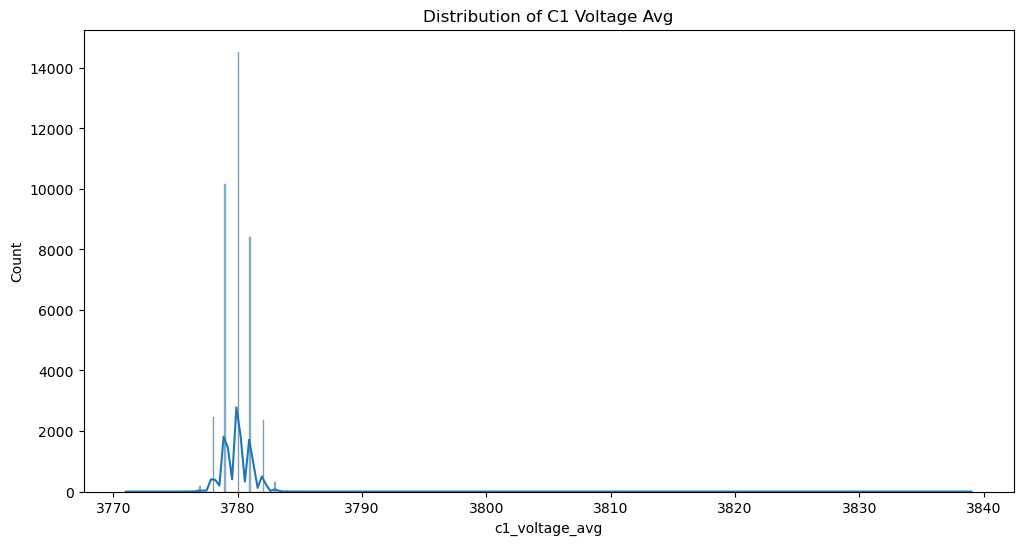

C:\Users\SAMSUNG\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


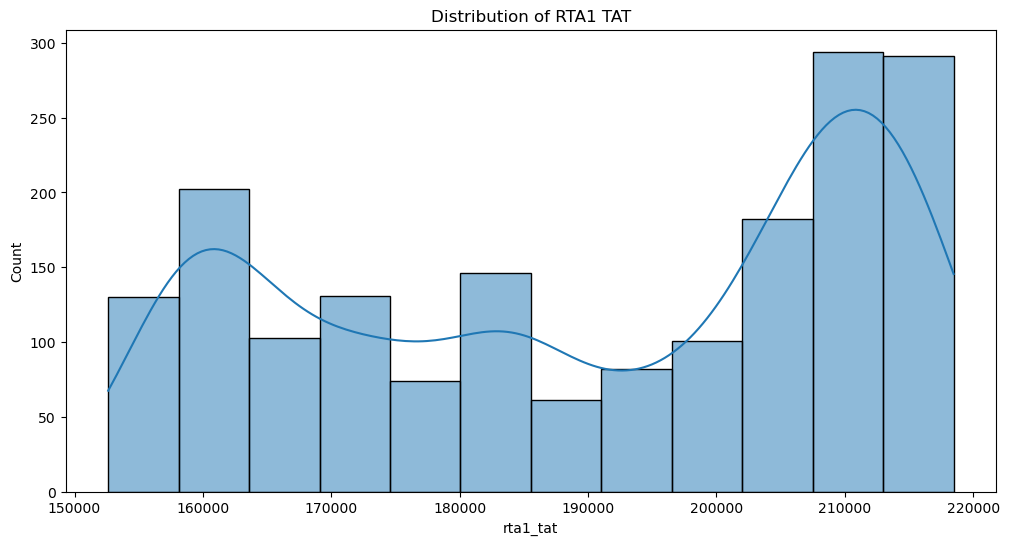

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주요 변수 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(df['c1_voltage_avg'], kde=True)
plt.title('Distribution of C1 Voltage Avg')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df2['rta1_tat'], kde=True)
plt.title('Distribution of RTA1 TAT')
plt.show()


C:\Users\SAMSUNG\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


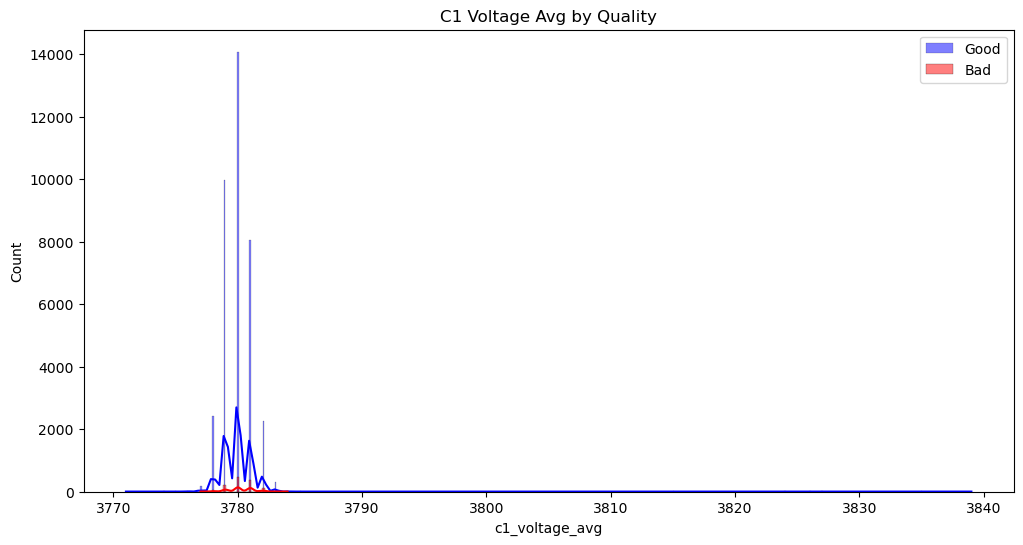

In [32]:
# 양품과 불량품 그룹 나누기
good_quality = df[df['judge'] == '양품']
bad_quality = df[df['judge'] != '양품']

# 주요 변수들의 분포 비교
plt.figure(figsize=(12, 6))
sns.histplot(good_quality['c1_voltage_avg'], color='blue', label='Good', kde=True)
sns.histplot(bad_quality['c1_voltage_avg'], color='red', label='Bad', kde=True)
plt.title('C1 Voltage Avg by Quality')
plt.legend()
plt.show()


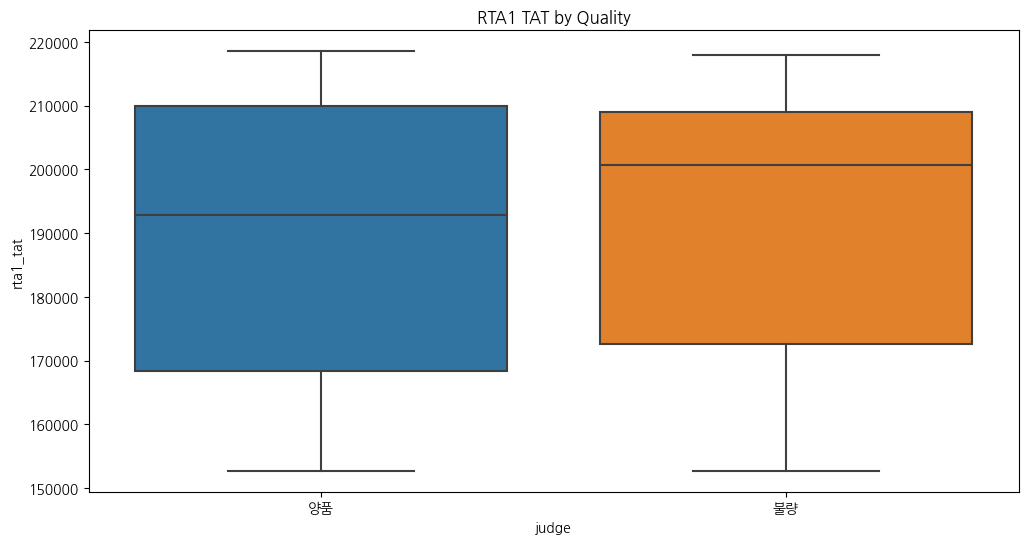

In [35]:
# bat_tat_data와 bat_process_data 병합
merged_data = pd.merge(df, df2, on=['lot_id', 'tray_id'])

# 공정 시간에 따른 품질 분석
plt.figure(figsize=(12, 6))
sns.boxplot(x='judge', y='rta1_tat', data=merged_data)
plt.title('RTA1 TAT by Quality')
plt.show()


In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

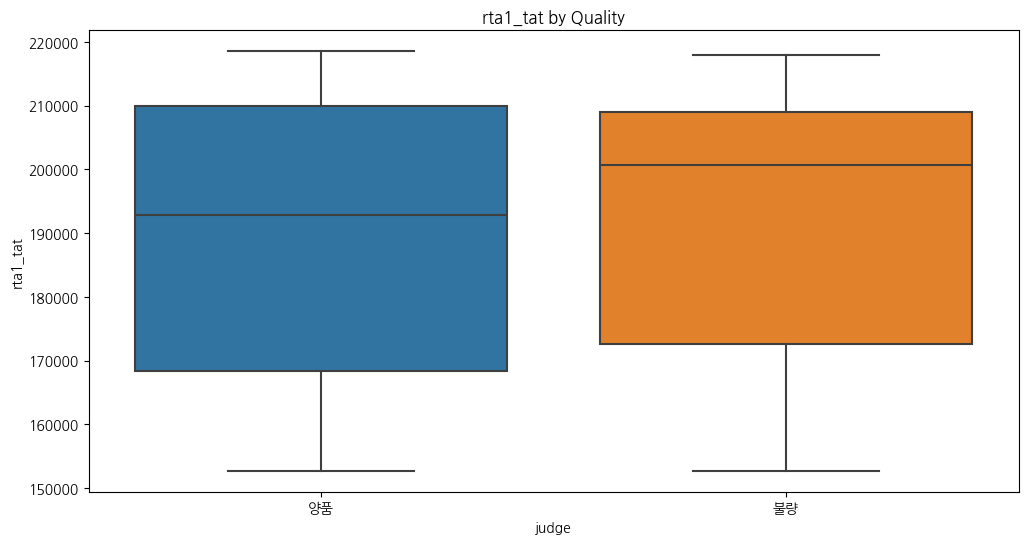

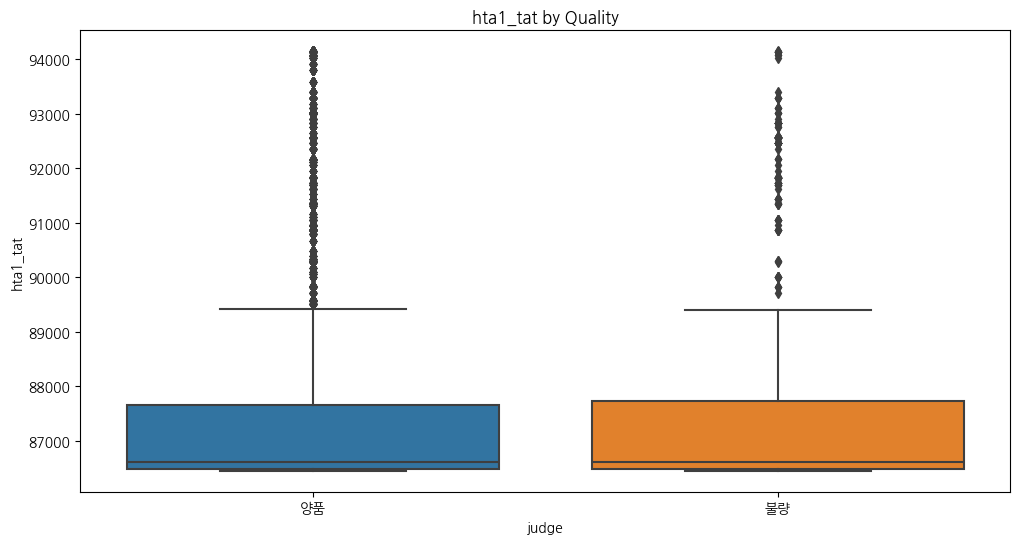

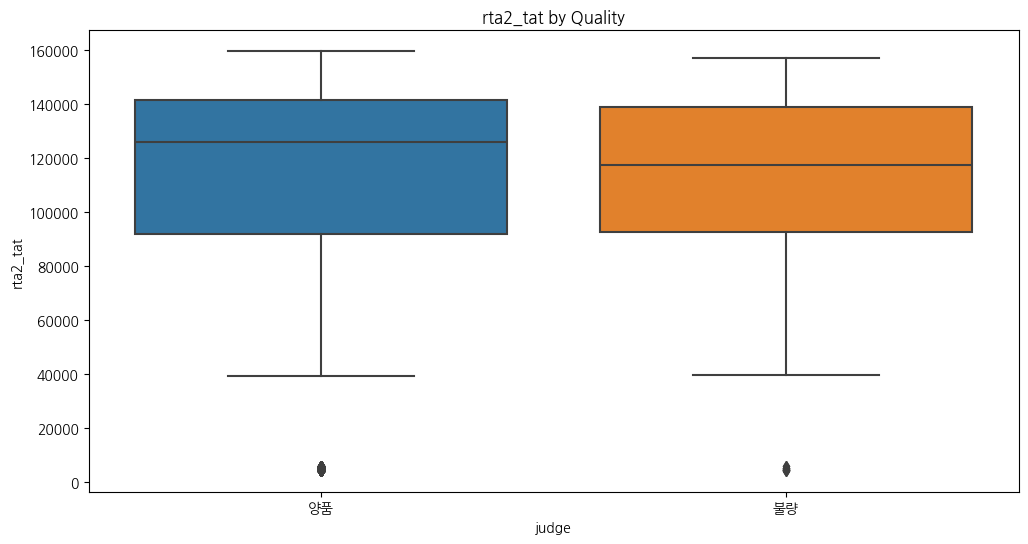

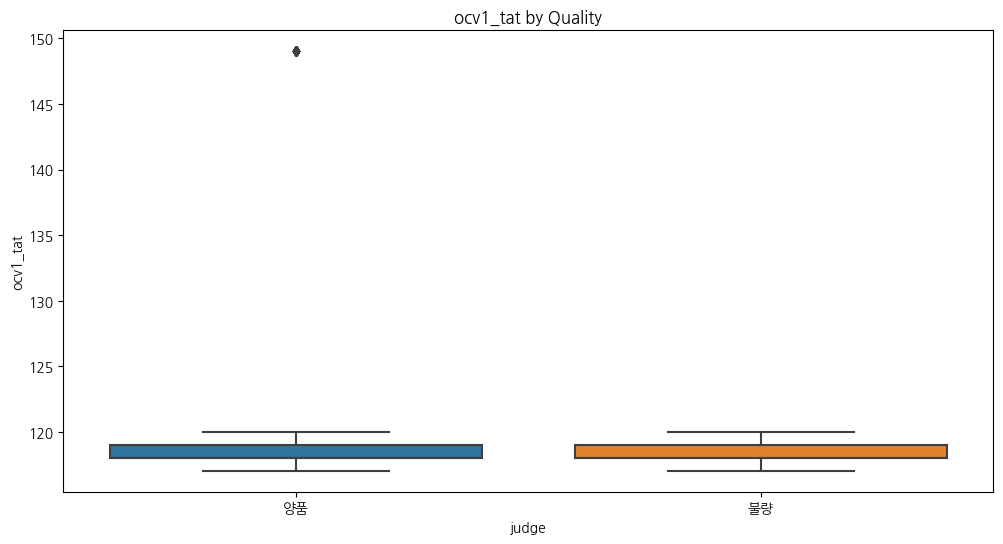

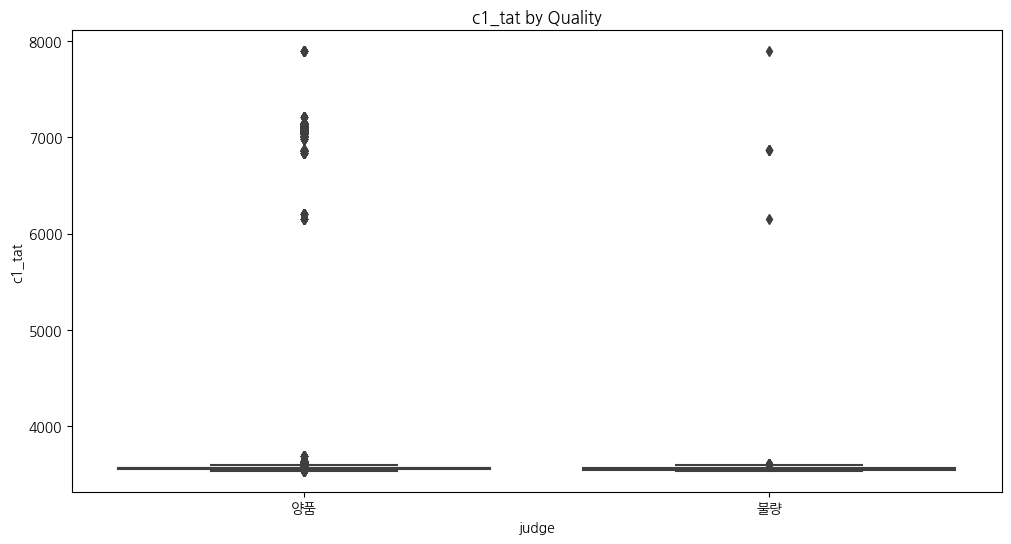

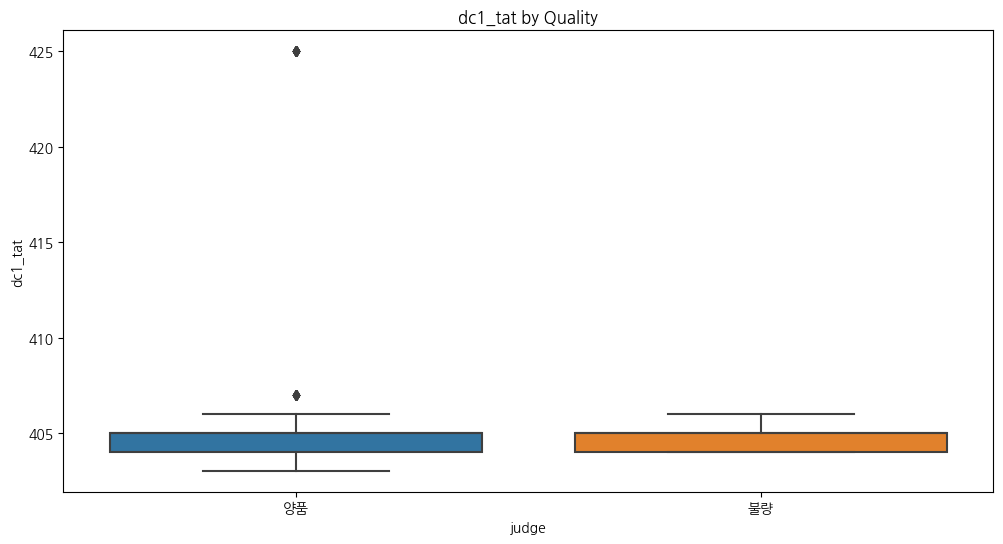

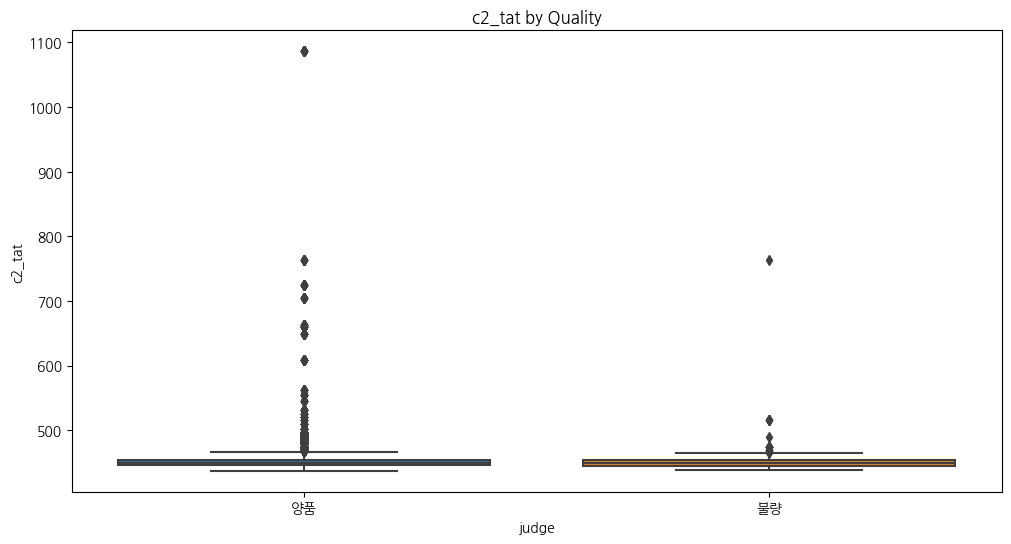

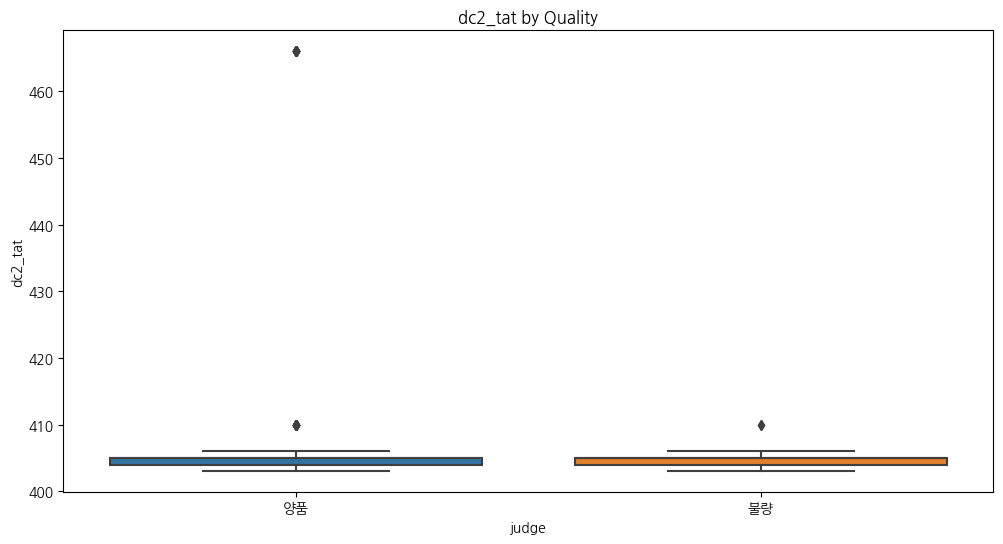

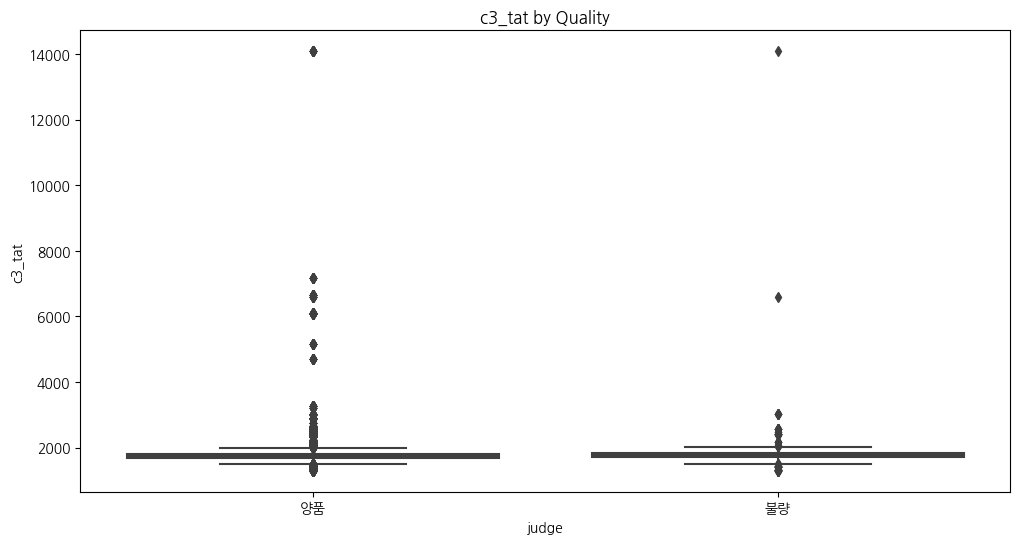

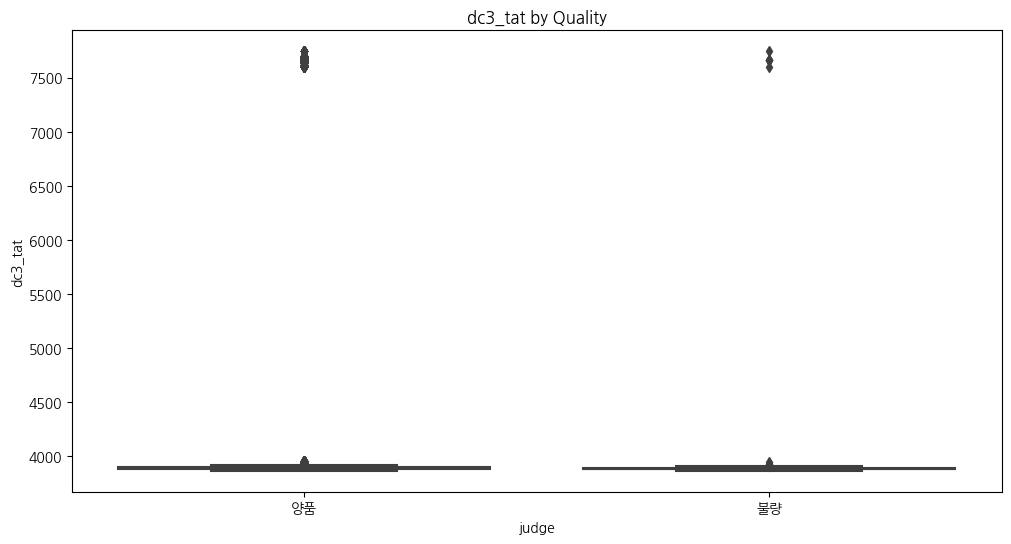

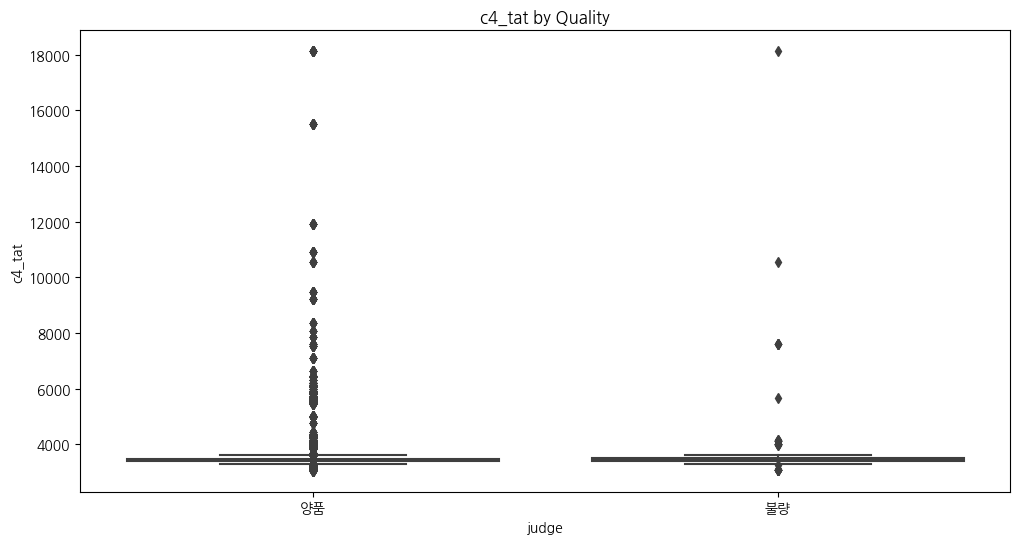

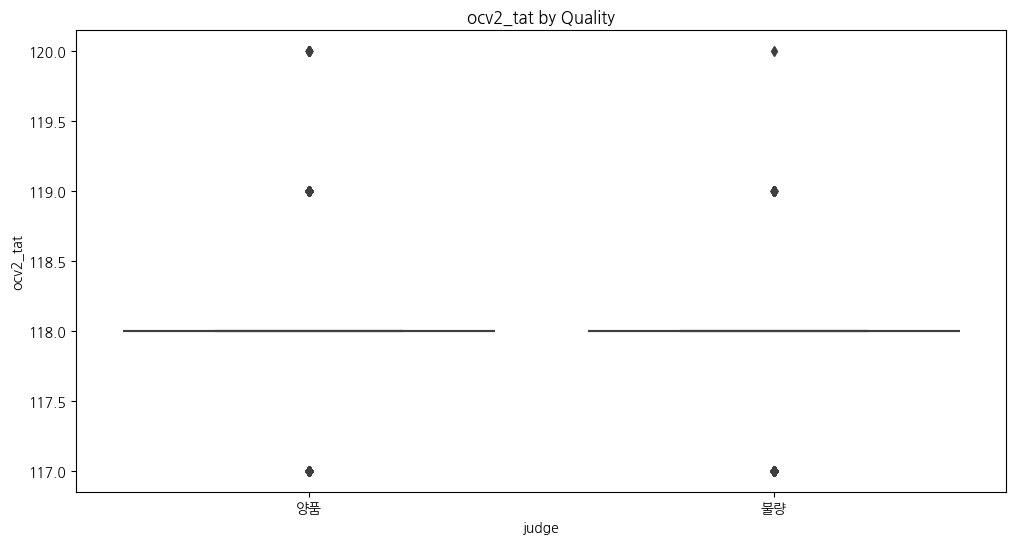

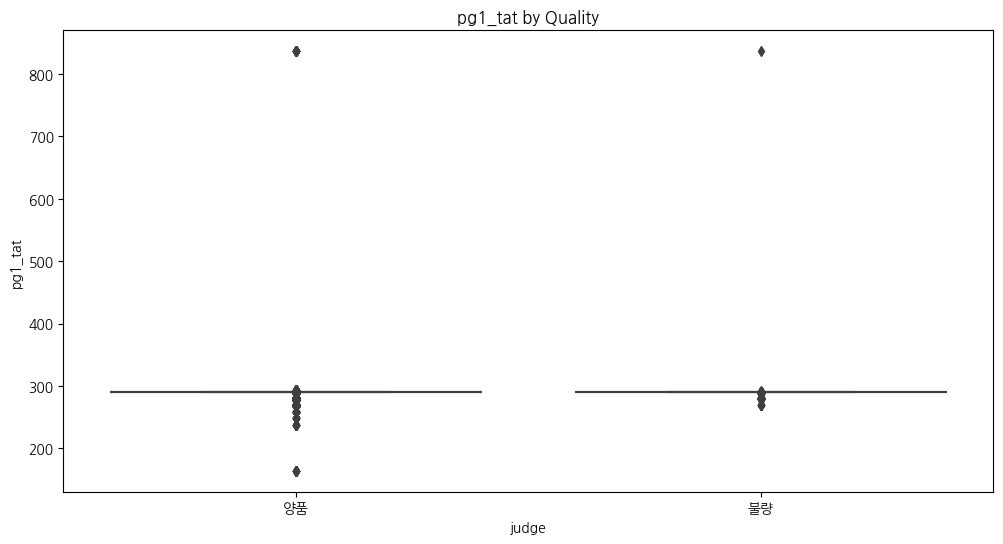

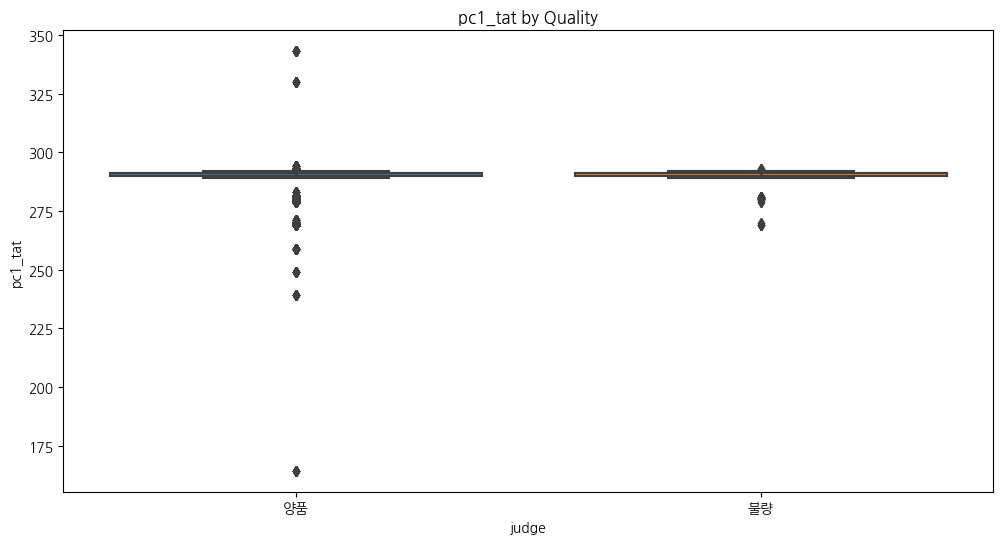

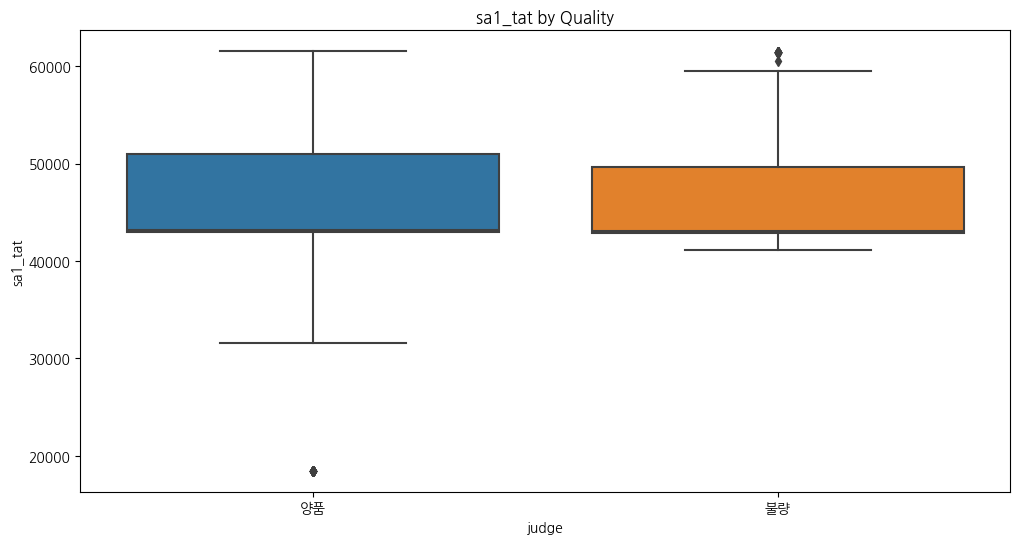

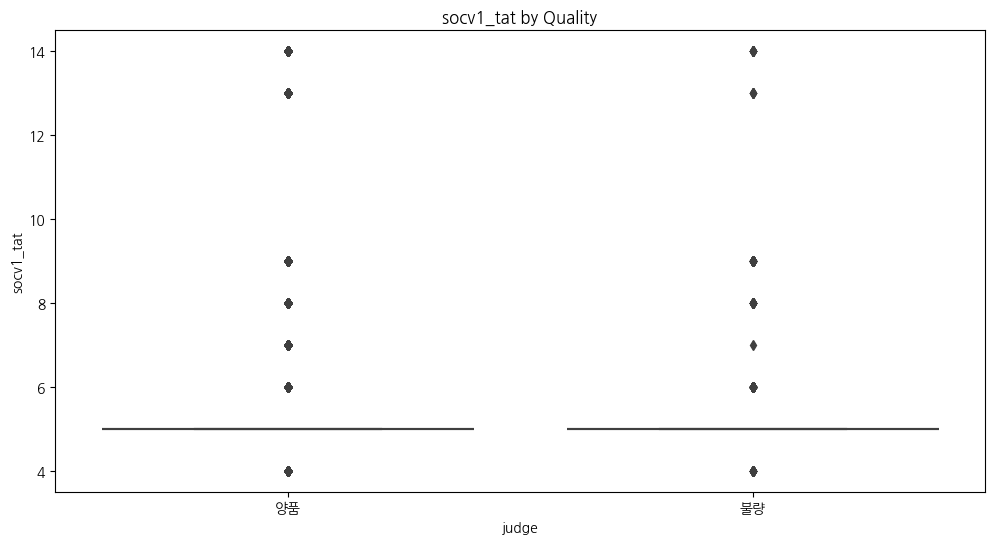

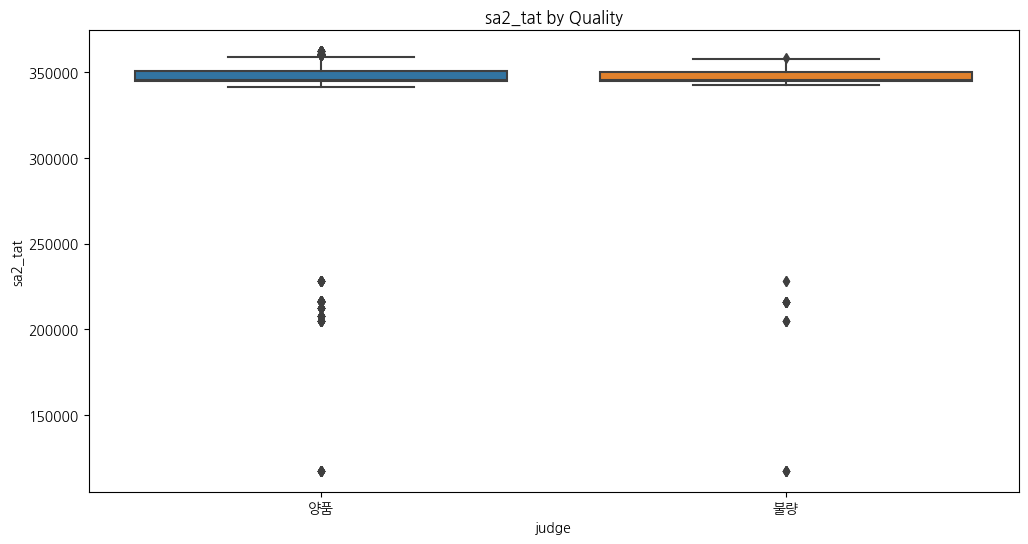

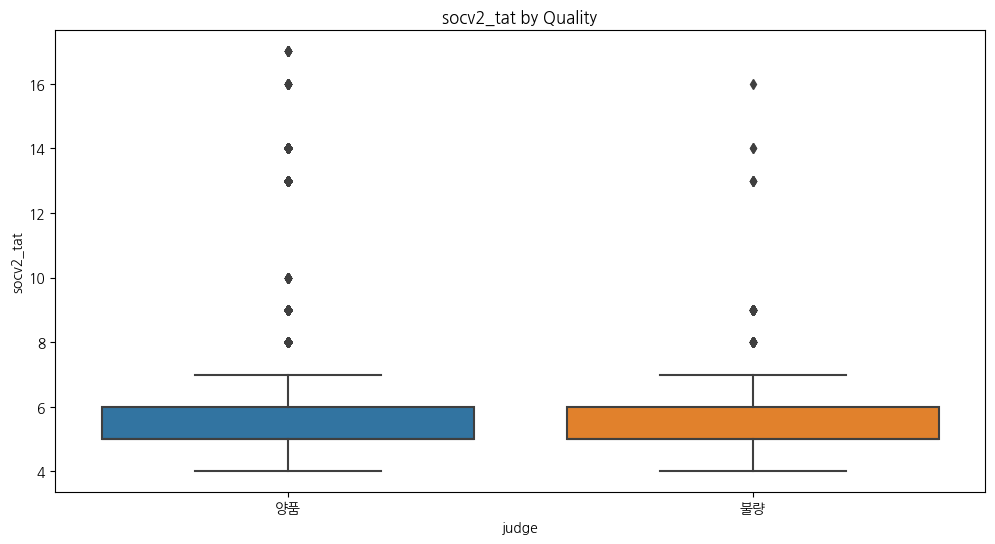

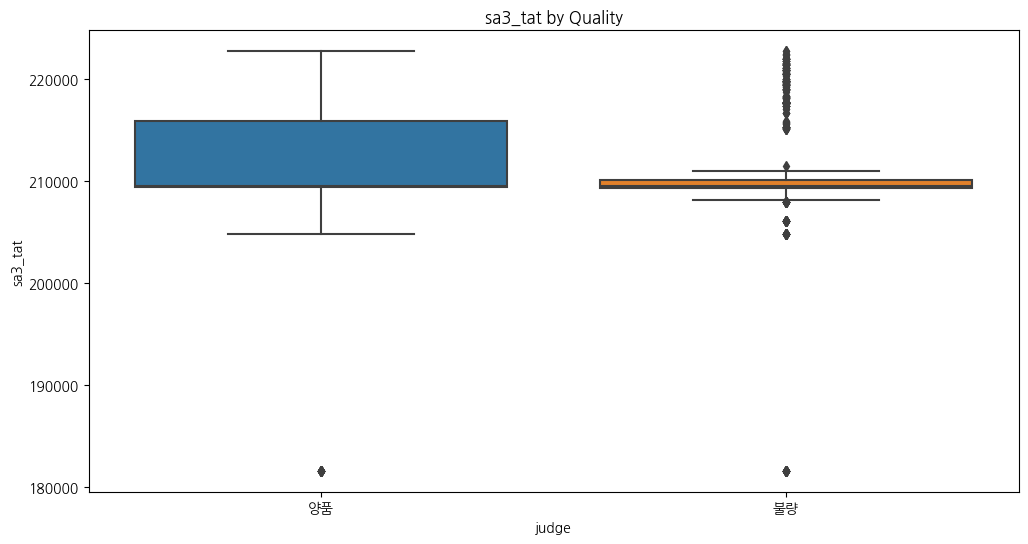

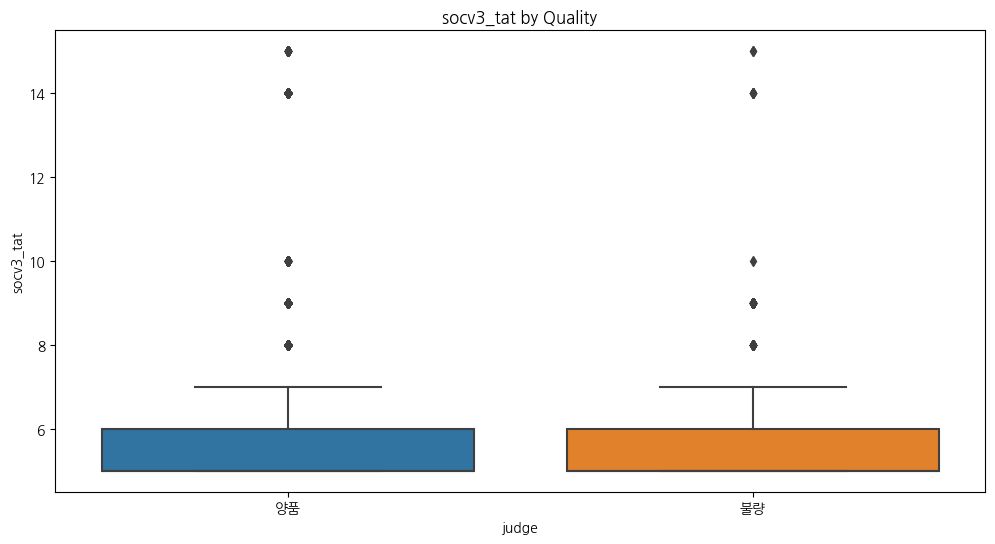

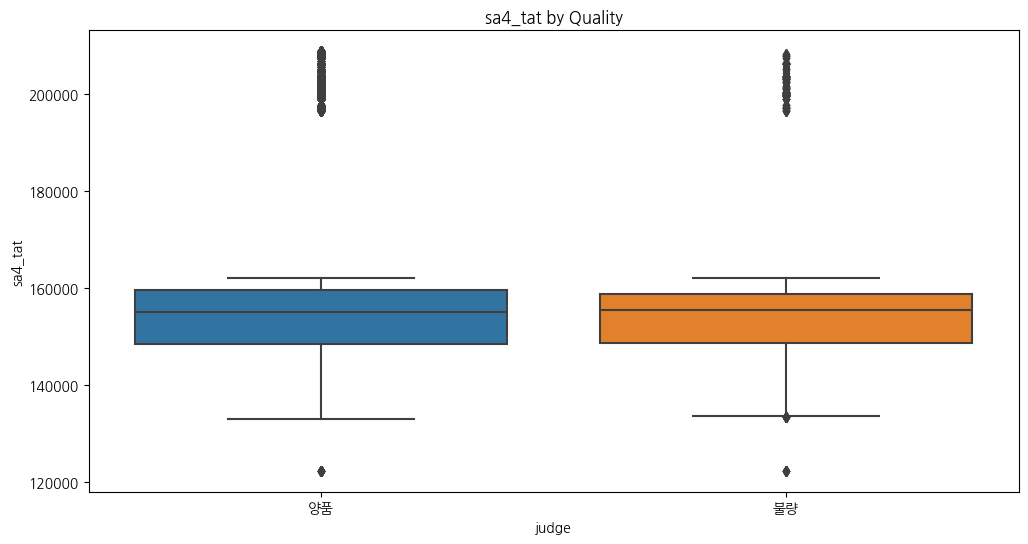

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 병합
merged_data = pd.merge(df, df2, on=['lot_id', 'tray_id'])

# tat 컬럼 목록
tat_columns = ['rta1_tat', 'hta1_tat', 'rta2_tat', 'ocv1_tat', 'c1_tat', 'dc1_tat', 
               'c2_tat', 'dc2_tat', 'c3_tat', 'dc3_tat', 'c4_tat', 'ocv2_tat', 
               'pg1_tat', 'pc1_tat', 'sa1_tat', 'socv1_tat', 'sa2_tat', 'socv2_tat', 
               'sa3_tat', 'socv3_tat', 'sa4_tat']

# 각 tat 컬럼에 대한 box-plot 생성
for column in tat_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='judge', y=column, data=merged_data)
    plt.title(f'{column} by Quality')
    plt.show()


In [ ]:
cd